In [52]:
import glob
import re
import os  


import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import pandas as pd
from utils import Graph
from mpl_toolkits.mplot3d import Axes3D
import itertools



os.chdir("/home/aidanshim/TRANSLATE/py/recombination_data")

# Load the data from the CSV file 
data = np.genfromtxt('ICARUS_TPC.csv', delimiter=',', skip_header=1)
r_k = data[:, 0]
prob = data[:, 1]
k_exp = 4.86e-05
k = k_exp / (1.396)




## Recombination Plots at 500V/cm and 200V/cm 

/tmp/ipykernel_787/1855830316.py:41: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(r_k_500v, mean,color='black', yerr=yerr,linewidth=2, marker ='s', fmt='o', capsize=3,label='Simulation Results at 500V/cm')


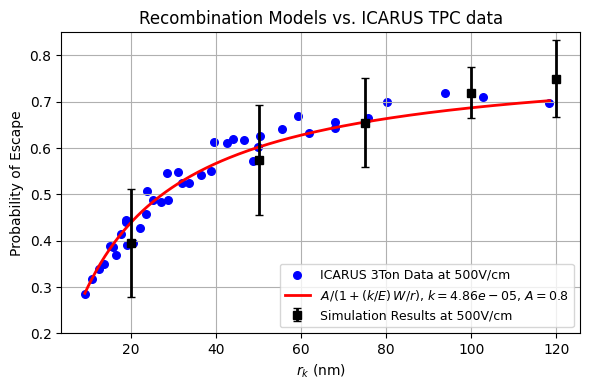

In [53]:

from scipy.optimize import curve_fit



df = pd.read_csv('5ev500vcm.csv', header=None)
r_k_500v = df.iloc[:, 0].values
prob_500v = df.iloc[:, 1:11]
mean = prob_500v.mean(axis=1).values
diff2 = (prob_500v.sub(mean, axis=0))**2
yerr = np.sqrt(diff2.mean(axis=1).values)



W = 23.6          # eV
E_cm = 500        # V/cm
E_nm = E_cm * 1e-7  # V/nm


def P2(r, k):
    return 0.8 / (1.0 + (k/(E_nm)) * (W/r))


def P(r, c2= 16.4, A = 0.8):
    return A/(1 + c2/r)


popt2, _ = curve_fit(P2, r_k, prob, p0=[1.0])
k_fit = popt2[0]


r_lin = np.linspace(r_k.min(), r_k.max(), 300)

plt.figure(figsize=(6,4))
plt.scatter(r_k, prob, color='b', s=30, label='ICARUS 3Ton Data at 500V/cm')



plt.plot(r_lin, P2(r_lin, k), color ='r', lw=2,
         label=r'$A/(1 + (k/E)\,W/r)$, $k=%.2e$, $A=0.8$' % k_exp)

plt.errorbar(r_k_500v, mean,color='black', yerr=yerr,linewidth=2, marker ='s', fmt='o', capsize=3,label='Simulation Results at 500V/cm')
plt.ylim(0.2, 0.85)

plt.xlabel(r'$r_k\ (\mathrm{nm})$')
plt.ylabel('Probability of Escape')
plt.title('Recombination Models vs. ICARUS TPC data')
plt.grid(True)
plt.legend(loc='best', fontsize=9)
plt.tight_layout()
plt.show()


/tmp/ipykernel_787/1477365616.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(r_k_200v, prob_200v, yerr = yerr, fmt='o', linewidth=2, capsize=3 ,marker ='s', color='black', label='Simulation Results at 200V/cm')


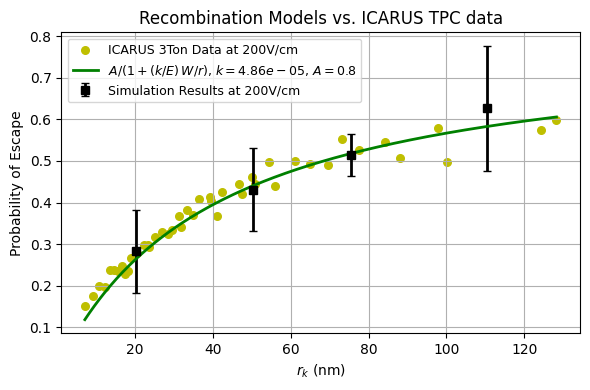

In [54]:
W = 23.6          # eV
E_cm = 200        # V/cm
E_nm = E_cm * 1e-7  # V/nm
# 200V/cm data
data = np.genfromtxt('ICARUS_TPC_200V.csv', delimiter=',')
r_k = data[:, 0]
prob = data[:, 1]


simulation_run_200V = np.genfromtxt('5ev200vcm.csv', delimiter=',')
r_k_200v = simulation_run_200V[:,0]
prob_200v = simulation_run_200V[:,1]

yerr = simulation_run_200V[:,2]

def P2(r, k):
    return 0.8 / (1.0 + (k/E_nm) * (W/r))



popt2, _ = curve_fit(P2, r_k, prob, p0=[1.0])
k_fit = popt2[0]



r_lin = np.linspace(r_k.min(), r_k.max(), 300)

plt.figure(figsize=(6,4))
plt.scatter(r_k, prob, color='y', s=30, label='ICARUS 3Ton Data at 200V/cm')
plt.errorbar(r_k_200v, prob_200v, yerr = yerr, fmt='o', linewidth=2, capsize=3 ,marker ='s', color='black', label='Simulation Results at 200V/cm')


plt.plot(r_lin, P2(r_lin, k), color ='g', lw=2,
         label=r'$A/(1 + (k/E)\,W/r)$, $k=%.2e$, $A=0.8$' % k_exp)

plt.xlabel(r'$r_k\ (\mathrm{nm})$')
plt.ylabel('Probability of Escape')
plt.title('Recombination Models vs. ICARUS TPC data')
plt.grid(True)
plt.legend(loc='best', fontsize=9)
plt.tight_layout()
plt.show()


## Recombination Plots with Angular Dependency

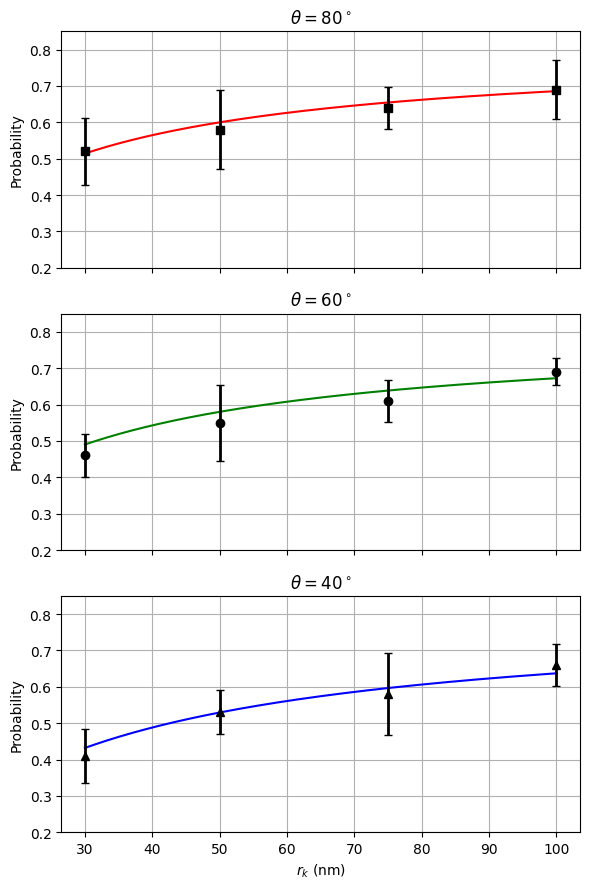

In [55]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

df80 = pd.read_csv('5ev500vcm80deg.csv', header=None)
df60 = pd.read_csv('5ev500vcm60deg.csv', header=None)
df40 = pd.read_csv('5ev500vcm40deg.csv', header=None)

def proc(df):
    r = df.iloc[:, 0].values
    p = df.iloc[:, 1:6]
    m = p.mean(axis=1).values
    y = np.sqrt(((p.sub(m, axis=0))**2).mean(axis=1).values)
    return r, m, y

r80, m80, y80 = proc(df80)
r60, m60, y60 = proc(df60)
r40, m40, y40 = proc(df40)

W, E_cm, E_nm = 23.6, 500, 500*1e-7
P = lambda r, ang: 0.8/(1+(k/(E_nm*np.sin(np.deg2rad(ang))))*(W/r))

r_lin = np.linspace(min(r40.min(), r60.min(), r80.min()),
                    max(r40.max(), r60.max(), r80.max()), 300)

fig, axs = plt.subplots(3, 1, figsize=(6, 9), sharex=True)
axs[0].plot(r_lin, P(r_lin, 80), c='r')
axs[0].errorbar(r80, m80, yerr=y80, fmt='s', c='k', lw=2, capsize=3)
axs[0].set_ylabel('Probability'); axs[0].set_title(r'$\theta=80^\circ$')

axs[1].plot(r_lin, P(r_lin, 60), c='g')
axs[1].errorbar(r60, m60, yerr=y60, fmt='o', c='k', lw=2, capsize=3)
axs[1].set_ylabel('Probability'); axs[1].set_title(r'$\theta=60^\circ$')

axs[2].plot(r_lin, P(r_lin, 40), c='b')
axs[2].errorbar(r40, m40, yerr=y40, fmt='^', c='k', lw=2, capsize=3)
axs[2].set_xlabel(r'$r_k$ (nm)'); axs[2].set_ylabel('Probability')
axs[2].set_title(r'$\theta=40^\circ$')

for ax in axs: ax.grid(True); ax.set_ylim(0.2, 0.85)
plt.tight_layout(); plt.show()





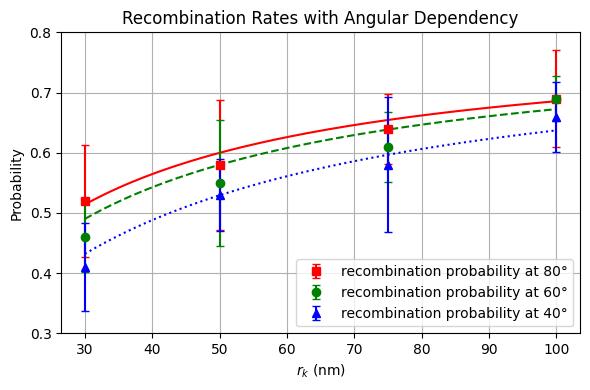

In [56]:
r_lin = np.linspace(min(r40.min(), r60.min(), r80.min()),
                    max(r40.max(), r60.max(), r80.max()), 300)

plt.figure(figsize=(6,4))
plt.plot(r_lin, P(r_lin, 80), c='r', ls='-')
plt.plot(r_lin, P(r_lin, 60), c='g', ls='--')
plt.plot(r_lin, P(r_lin, 40), c='b', ls=':')

plt.errorbar(r80, m80, yerr=y80, fmt='s', c='r', lw=1.5, capsize=3,
             label='recombination probability at 80°')
plt.errorbar(r60, m60, yerr=y60, fmt='o', c='g', lw=1.5, capsize=3,
             label='recombination probability at 60°')
plt.errorbar(r40, m40, yerr=y40, fmt='^', c='b', lw=1.5, capsize=3,
             label='recombination probability at 40°')

plt.xlabel(r'$r_k$ (nm)')
plt.ylabel('Probability')
plt.title('Recombination Rates with Angular Dependency')
plt.ylim(0.3, 0.8)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


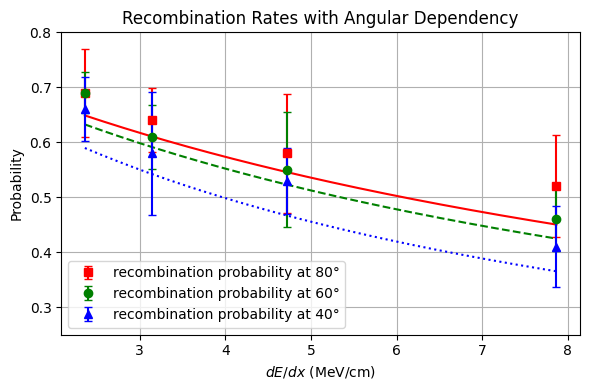

In [62]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

df80 = pd.read_csv('5ev500vcm80deg.csv', header=None)
df60 = pd.read_csv('5ev500vcm60deg.csv', header=None)
df40 = pd.read_csv('5ev500vcm40deg.csv', header=None)

def proc(df):
    r = df.iloc[:, 0].values                    # r_k in nm
    p = df.iloc[:, 1:6]
    m = p.mean(axis=1).values
    y = np.sqrt(((p.sub(m, axis=0))**2).mean(axis=1).values)
    dEdx = 236 / r                              # MeV/cm  (23.6 eV ÷ 1 nm = 236 MeV/cm)
    return dEdx, m, y

x80, m80, e80 = proc(df80)
x60, m60, e60 = proc(df60)
x40, m40, e40 = proc(df40)

W, E_cm, E_nm, k = 23.6, 500, 500*1e-7, 4.86e-5
P = lambda r_nm, ang: 0.8/(1+(k/(E_nm*np.sin(np.deg2rad(ang))))*(W/r_nm))
dEdx_lin = np.linspace(min(x40.min(), x60.min(), x80.min()),
                       max(x40.max(), x60.max(), x80.max()), 300)
r_lin_nm = 236 / dEdx_lin                       # invert to r_k for the model

curve80 = P(r_lin_nm, 80)
curve60 = P(r_lin_nm, 60)
curve40 = P(r_lin_nm, 40)

plt.figure(figsize=(6,4))
plt.plot(dEdx_lin, curve80, c='r', ls='-')
plt.plot(dEdx_lin, curve60, c='g', ls='--')
plt.plot(dEdx_lin, curve40, c='b', ls=':')

plt.errorbar(x80, m80, yerr=e80, fmt='s', c='r', lw=1.5, capsize=3,
             label='recombination probability at 80°')
plt.errorbar(x60, m60, yerr=e60, fmt='o', c='g', lw=1.5, capsize=3,
             label='recombination probability at 60°')
plt.errorbar(x40, m40, yerr=e40, fmt='^', c='b', lw=1.5, capsize=3,
             label='recombination probability at 40°')

plt.xlabel(r'$dE/dx$ (MeV/cm)')
plt.ylabel('Probability')
plt.ylim(0.25, 0.8)
plt.title('Recombination Rates with Angular Dependency')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
